In [5]:
import logging

from datetime import datetime

from electricity_demand_fc.data_retrieval import (
    get_raster_points_inside_nl,
    get_gfs_data,
    extract_gfs_data,
    interpolate_to_resolution,
    get_demand_entsoe
)

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
log = logging.getLogger(__name__)

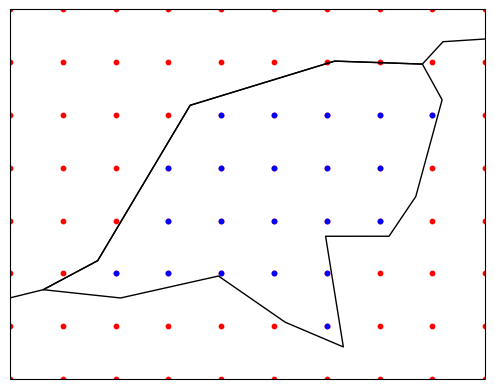

,geometry
0,POINT (4.00000 51.50000)
1,POINT (4.50000 51.50000)
2,POINT (4.50000 52.00000)
3,POINT (4.50000 52.50000)
4,POINT (5.00000 51.50000)
5,POINT (5.00000 52.00000)
6,POINT (5.00000 52.50000)
7,POINT (5.00000 53.00000)
8,POINT (5.50000 51.50000)
9,POINT (5.50000 52.00000)


In [6]:
points = get_raster_points_inside_nl(plot=True, raster_size=0.5)
points

In [7]:
start_date = datetime(year=2023, month=1, day=1)
end_date = datetime(year=2023, month=1, day=1, hour=12)
dataset = get_gfs_data(start_date, end_date)
dataset

2023-08-22 00:50:58,609 - INFO - 🧵 Working on 6 tasks with 6 threads.


✅ Found ┊ model=gfs ┊ product=pgrb2.0p50 ┊ 2023-Jan-01 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


2023-08-22 00:51:03,554 - INFO - Number of Herbie objects: 6


✅ Found ┊ model=gfs ┊ product=pgrb2.0p50 ┊ 2023-Jan-01 06:00 UTC F03 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=gfs ┊ product=pgrb2.0p50 ┊ 2023-Jan-01 00:00 UTC F03 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=gfs ┊ product=pgrb2.0p50 ┊ 2023-Jan-01 12:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=gfs ┊ product=pgrb2.0p50 ┊ 2023-Jan-01 12:00 UTC F03 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=gfs ┊ product=pgrb2.0p50 ┊ 2023-Jan-01 06:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


<xarray.Dataset>
Dimensions:              (time: 3, step: 2, latitude: 361, longitude: 720)
Coordinates:
  * time                 (time) datetime64[ns] 2023-01-01 ... 2023-01-01T12:0...
  * step                 (step) timedelta64[ns] 00:00:00 03:00:00
    heightAboveGround    float64 2.0
  * latitude             (latitude) float64 90.0 89.5 89.0 ... -89.0 -89.5 -90.0
  * longitude            (longitude) float64 0.0 0.5 1.0 ... 358.5 359.0 359.5
    valid_time           (step, time) datetime64[ns] 2023-01-01 ... 2023-01-0...
Data variables:
    t2m                  (step, time, latitude, longitude) float32 243.2 ... ...
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP 
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP 
    model:                   gfs
    product:                 pgrb2.0p50
    description:             Global Forecast System
    searchString:            :TMP:2 m above ground

In [8]:
df_X_3_hourly = extract_gfs_data(points=points, dataset=dataset, variable="t2m", start_date=start_date, end_date=end_date)
df_X_3_hourly

ValueError: Length of values (6) does not match length of index (5)

In [ ]:
df_X = interpolate_to_resolution(df_X_3_hourly, resolution="15T")
df_X

51.5                    52.0        52.5  \
                            4.0         4.5         4.5         4.5   
2023-01-01 00:00:00  287.258057  287.938049  287.638062  284.168060   
2023-01-01 00:15:00  287.103302  287.795776  287.462463  284.096619   
2023-01-01 00:30:00  286.948517  287.653503  287.286865  284.025208   
2023-01-01 00:45:00  286.793762  287.511261  287.111267  283.953766   
2023-01-01 01:00:00  286.638977  287.368988  286.935669  283.882324   
2023-01-01 01:15:00  286.484222  287.226715  286.760071  283.810883   
2023-01-01 01:30:00  286.329468  287.084473  286.584473  283.739441   
2023-01-01 01:45:00  286.174683  286.942200  286.408844  283.668030   
2023-01-01 02:00:00  286.019928  286.799927  286.233246  283.596588   
2023-01-01 02:15:00  285.865143  286.657654  286.057648  283.525146   
2023-01-01 02:30:00  285.710388  286.515381  285.882050  283.453735   
2023-01-01 02:45:00  285.555603  286.373138  285.706451  283.382294   
2023-01-01 03:00:00  285.400848  286.230865  285.530853  283.310852   
2023-01-01 03:15:00  285.476929  286.283630  285.621094  283.339447   
2023-01-01 03:30:00  285.553009  286.336365  285.711365  283.368011   
2023-01-01 03:45:00  285.629089  286.389099  285.801605  283.396606   
2023-01-01 04:00:00  285.705200  286.441864  285.891846  283.425201   
2023-01-01 04:15:00  285.781281  286.494629  285.982117  283.453766   
2023-01-01 04:30:00  285.857361  286.547363  286.072357  283.482361   
2023-01-01 04:45:00  285.933441  286.600098  286.162598  283.510956   
2023-01-01 05:00:00  286.009521  286.652863  286.252869  283.539520   
2023-01-01 05:15:00  286.085632  286.705627  286.343109  283.568115   
2023-01-01 05:30:00  286.161713  286.758362  286.433350  283.596710   
2023-01-01 05:45:00  286.237793  286.811096  286.523621  283.625275   
2023-01-01 06:00:00  286.313873  286.863861  286.613861  283.653870   
2023-01-01 06:15:00  286.220306  286.745300  286.500275  283.601959   
2023-01-01 06:30:00  286.126709  286.626709  286.386719  283.550049   
2023-01-01 06:45:00  286.033142  286.508148  286.273132  283.498138   
2023-01-01 07:00:00  285.939575  286.389557  286.159576  283.446228   
2023-01-01 07:15:00  285.846008  286.270996  286.045990  283.394318   
2023-01-01 07:30:00  285.752441  286.152405  285.932434  283.342407   
2023-01-01 07:45:00  285.658844  286.033844  285.818848  283.290527   
2023-01-01 08:00:00  285.565277  285.915283  285.705261  283.238617   
2023-01-01 08:15:00  285.471710  285.796692  285.591705  283.186707   
2023-01-01 08:30:00  285.378113  285.678131  285.478119  283.134796   
2023-01-01 08:45:00  285.284546  285.559540  285.364563  283.082886   
2023-01-01 09:00:00  285.190979  285.440979  285.250977  283.030975   

                           51.5        52.0        52.5        53.0  \
                            5.0         5.0         5.0         5.0   
2023-01-01 00:00:00  287.928040  287.508057  286.858032  284.328033   
2023-01-01 00:15:00  287.815765  287.370789  286.714935  284.264923   
2023-01-01 00:30:00  287.703522  287.233521  286.571838  284.201843   
2023-01-01 00:45:00  287.591248  287.096252  286.428741  284.138733   
2023-01-01 01:00:00  287.478973  286.958984  286.285645  284.075653   
2023-01-01 01:15:00  287.366730  286.821716  286.142548  284.012543   
2023-01-01 01:30:00  287.254456  286.684448  285.999451  283.949463   
2023-01-01 01:45:00  287.142181  286.547211  285.856354  283.886353   
2023-01-01 02:00:00  287.029938  286.409943  285.713257  283.823242   
2023-01-01 02:15:00  286.917664  286.272675  285.570160  283.760162   
2023-01-01 02:30:00  286.805389  286.135406  285.427063  283.697052   
2023-01-01 02:45:00  286.693146  285.998138  285.283966  283.633972   
2023-01-01 03:00:00  286.580872  285.860870  285.140869  283.570862   
2023-01-01 03:15:00  286.646118  285.905273  285.220276  283.571106   
2023-01-01 03:30:00  286.711365  285.949707  285.299713  283.571350   
2023-01-01 03:45:00  286.776611  285.994110  285.3

In [ ]:
df_y = get_demand_entsoe(start_date, end_date)
df_y

,Actual Load
2023-01-01 00:00:00,9847.0
2023-01-01 00:15:00,9801.0
2023-01-01 00:30:00,9746.0
2023-01-01 00:45:00,9680.0
2023-01-01 01:00:00,9640.0
2023-01-01 01:15:00,9613.0
2023-01-01 01:30:00,9524.0
2023-01-01 01:45:00,9439.0
2023-01-01 02:00:00,9398.0
2023-01-01 02:15:00,9325.0
